In [191]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

In [192]:
#Reading data from CSV file
Dataset = pd.read_csv('Fish.csv')
print(Dataset)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [193]:
#Read only Column name Weight Data
dataset1 = Dataset['Weight']
dataset1.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

In [194]:
# Select model from the Scikitlearn and then divided the data into 80% Training and 20% Testing
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(Dataset, test_size=0.2, random_state=12)

In [195]:
# Create CSV file for TrainData and TestData
Train.to_csv('TrainData.csv' ,index=False)
Test.to_csv('TestData.csv',index = False)

In [196]:
# Read TrainData and TestData CSV file
Train_data = pd.read_csv("TrainData.csv")
Test_data = pd.read_csv("TestData.csv")

In [197]:
# Create variable input_features and Output for the Simple linear regression
input_features = ['Length1' , 'Length2' , 'Length3' , 'Height' , 'Width']
print(input_features)
output = ['Weight']
print(output)

['Length1', 'Length2', 'Length3', 'Height', 'Width']
['Weight']


###### Q.1 Write a generic function that accepts a column of data ‘input_feature’ and another column ‘output’ and returns the Simple Linear Regression parameters ‘intercept’ and ‘slope’. Use the closed form solution to calculate the slope and intercept.

In [198]:
# Create function for simple linear regression which taking two parameters one for input_features and one for Output.
def simple_linear_regression(input_features, output):
    sumY = output.sum()
    sumX = input_features.sum()
    sumYX = (output*input_features).sum()
    sumXX = (input_features**2).sum()
    n = float(len(input_features))
    slope = (sumYX - ((sumY*sumX)/n))/(sumXX - ((sumX*sumX)/n))
    #print(slope)
    intercept = (sumY/n) - slope*(sumX/n)
    #print(intercept)
    return(intercept, slope)

In [199]:
# This is the sample test function where we know the answer and we passed a value. In particular we create feature and then output exactly on a line. 
# output = 1 + 1*input_feature then our output for the intercept and slope should be 1.
# Below code is taken from the Wiriyapong, B., & TH, K. (2020). bensw. Retrieved 20 October 2020, from http://www.bensw.xyz/regression/Simple-Linear-Regression/
test_feature = pd.DataFrame(range(5))
test_output = pd.DataFrame(1+1*test_feature)
(test_intercept, test_slope) =  simple_linear_regression(test_feature, test_output)
print("Intercept: " + str(test_intercept[0]))
print("Slope: " + str(test_slope[0]))

Intercept: 1.0
Slope: 1.0


###### Q.2 Write a function that accepts a column of data ‘input_feature’, the ‘slope’, and the ‘intercept’ you learned, and returns a column of predictions ‘predicted_output’ for each entry in the input column.

In [200]:
# We have three parameters for the model predeiction. Below function return the predticted outvalues for the input_features, Slope and Intercept.
def Regrssion_Prediction(input_features, intercept, slope):
    predicted_OutputValues = intercept + slope*input_features
    return predicted_outputValues


###### Q.3 Write a function that accepts a column of data: ‘input_feature’, and ‘output’ and the regression parameters ‘slope’ and ‘intercept’ and outputs the Residual Sum of Squares (RSS).

In [201]:
# For the prediction we evalute our model using Residual sum of squres(RSS). 
# RSS is the difference between the predicted output and true output.
# Below function gives RSS for a simple linear regression with the parameters input_features, Output, Intercept and Slope.
def Residual_Squares_Of_Sum(input_features, output, intercept, slope):
    predicted_valuesouput = intercept + slope*input_features
    residuals_output = output - predicted_valuesoutput
    residuals_squre = residuals_output * residuals_output
    RSS = residual_square.sum()
    return(RSS)



In [209]:
#x = Dataset.drop('Species' , axis=1)
#y = Dataset.Weight
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#x_train.head()
#len(x_train)

###### Q.4  Use your function to estimate the slope and intercept on the training data to predict weight of fish for each one of the following (one at a time) inputs. Save each model (slope and intercept) separately. ‘Weight of the fish’ will be the ‘output’ and each of the following as an ‘input_feature’.

In [210]:
# We have different features for the fish data. But we make simple linear regrssion function for the different input_features in the comaprision of the Weight. 
# Below code estimate the interecept and slope for the each features. 
# Here we included Width,Length1,Length2,Length3 and Height as input_features

Length1_intercept, Length1_slope = simple_linear_regression(x_train['Length1'],y_train)
print("Intercept_Length1:", Length1_intercept)
print("Slope_Length1" , Length1_slope)

Length2_intercept, Length2_slope = simple_linear_regression(x_train['Length2'],y_train)
print("Intercept_Lenght2:", Length2_intercept)
print("Slope_Length2" , Length2_slope)

Length3_intercept, Length3_slope = simple_linear_regression(x_train['Length3'],y_train)
print("Intercept_Length3:", Length3_intercept)
print("Slope_Length3" , Length3_slope)

Height_intercept, Height_slope = simple_linear_regression(x_train['Height'],y_train)
print("Intercept_Height", Height_intercept)
print("Slope_Height" , Height_slope)

Width_intercept, Width_slope = simple_linear_regression(x_train['Width'],y_train)
print("Intercept_Width: ",Width_intercept)
print("Slope_Width: ",Width_slope)



Intercept_Length1: -480.0884960039758
Slope_Length1 33.416258748400296
Intercept_Lenght2: -494.3214698885416
Slope_Length2 31.32767883570932
Intercept_Length3: -510.8409515559273
Slope_Length3 29.00854679318342
Intercept_Height -156.29185369094796
Slope_Height 60.450449066829364
Intercept_Width:  -471.6902324034189
Slope_Width:  192.89807114052095


##### Q.5 Using above estimated slopes and intercepts for each of model, fit a line through training data points. Draw separate plot for each of the ‘input_feature’.

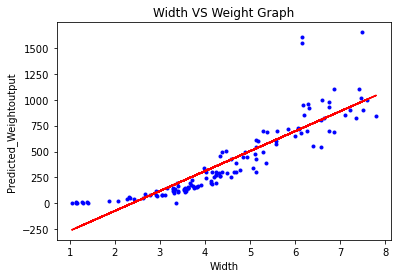

<Figure size 432x288 with 0 Axes>

In [204]:
#Below code is fit a line over training data using the slopes and intercept which we estimated above.
#We use predicted output values to plot a best fit line over the data points. 

# plot graph for Width VS Weight
Width_plot = x_train.Width
Weight_plot = x_train.Weight
width_plotline = Width_plot * Width_slope + Width_intercept

plt.figure()
plt.plot(Width_plot,Weight_plot, 'b.')
plt.plot(Width_plot,width_plotline, 'r-')
plt.title("Width VS Weight Graph")
plt.xlabel("Width")
plt.ylabel("Predicted_Weightoutput ")
plt.show()
plt.savefig('width graph.png')


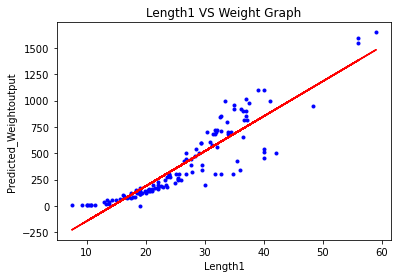

<Figure size 432x288 with 0 Axes>

In [205]:
#plot graph for length1 VS Weight
Length1_plot = x_train.Length1
Weight_plot = x_train.Weight
Length1_plotline = Length1_plot * Length1_slope + Length1_intercept

plt.figure()
plt.plot(Length1_plot,Weight_plot, 'b.')
plt.plot(Length1_plot,Length1_plotline, 'r-')
plt.title("Length1 VS Weight Graph")
plt.xlabel("Length1")
plt.ylabel("Predicted_Weightoutput ")
plt.show()
plt.savefig('Length1 graph.png')


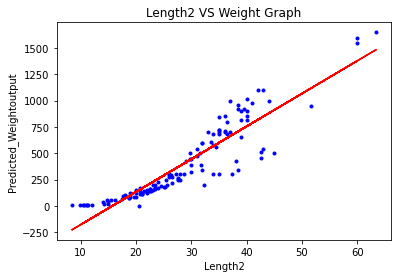

<Figure size 432x288 with 0 Axes>

In [206]:
#plot graph for length2 VS Weight
Length2_plot = x_train.Length2
Weight_plot = x_train.Weight
Length2_plotline = Length2_plot * Length2_slope + Length2_intercept

plt.figure()
plt.plot(Length2_plot,Weight_plot, 'b.')
plt.plot(Length2_plot,Length2_plotline, 'r-')
plt.title("Length2 VS Weight Graph")
plt.xlabel("Length2")
plt.ylabel("Predicted_Weightoutput")
plt.show()
plt.savefig('Length2 graph.png')

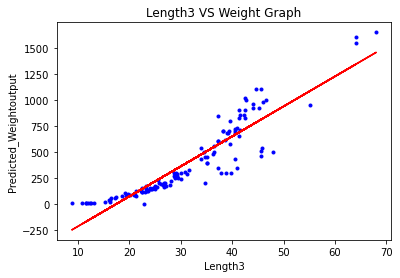

<Figure size 432x288 with 0 Axes>

In [207]:
#plot graph for length3 VS Weight
Length3_plot = x_train.Length3
Weight_plot = x_train.Weight
Length3_plotline = Length3_plot * Length3_slope + Length3_intercept

plt.figure()
plt.plot(Length3_plot,Weight_plot, 'b.')
plt.plot(Length3_plot,Length3_plotline, 'r-')
plt.title("Length3 VS Weight Graph")
plt.xlabel("Length3")
plt.ylabel("Predicted_Weightoutput")
plt.show()
plt.savefig('Length3 graph.png')

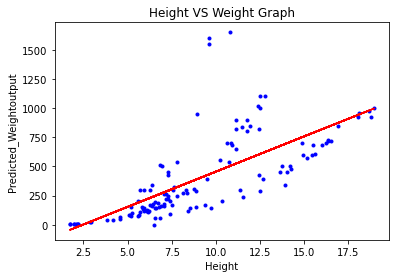

<Figure size 432x288 with 0 Axes>

In [208]:
#plot graph for Height VS Weight
Height_plot = x_train.Height
Weight_plot = x_train.Weight
Height_plotline = Height_plot * Height_slope + Height_intercept

plt.figure()
plt.plot(Height_plot,Weight_plot, 'b.')
plt.plot(Height_plot,Height_plotline, 'r-')
plt.title("Height VS Weight Graph")
plt.xlabel("Height")
plt.ylabel("Predicted_Weightoutput")
plt.show()
plt.savefig('Height graph.png')

##### Q. 6 Plot the RSS vs input_features for training and test data. Which model has lowest RSS on TEST data? Think about why this might be the case.

In [125]:
# Below function calcultaing the RSS value for the training and testing data. 
# Here we included Width,Length1,Length2,Length3 and Height as input_features

#RSS values for Length1
Testdata_rss_length1 = Residual_Squares_Of_Sum(x_test['Length1'],y_test ,Length1_intercept , Length1_slope)
print('Testdata_rss_length1:' ,Testdata_rss_length1)
Traindata_rss_length1 = Residual_Squares_Of_Sum(x_train['Length1'], y_train ,Length1_intercept , Length1_slope)
print('Traindata_rss_length1:' ,Traindata_rss_length1)

#RSS values for Length2
Testdata_rss_length2 = Residual_Squares_Of_Sum(x_test['Length2'], y_test,Length2_intercept , Length2_slope)
print('Testdata_rss_length2:' , Testdata_rss_length2)
Traindata_rss_length2 = Residual_Squares_Of_Sum(x_train['Length2'], y_train,Length2_intercept , Length2_slope)
print('Traindata_rss_length2:', Traindata_rss_length2)

#RSS values for Length3
Testdata_rss_length3 = Residual_Squares_Of_Sum(x_test['Length3'], y_test,Length3_intercept , Length3_slope)
print('Testdata_rss_length3:',Testdata_rss_length3)
Traindata_rss_length3 = Residual_Squares_Of_Sum(x_train['Length3'], y_train,Length3_intercept , Length3_slope)
print('Traindata_rss_length3:',Traindata_rss_length3)

#RSS Values for Width
Testdata_rss_width = Residual_Squares_Of_Sum(x_test['Width'], y_test,Width_intercept , Width_slope)
print('Testdata_rss_width:',Testdata_rss_width)
Traindata_rss_width = Residual_Squares_Of_Sum(x_train['Width'], y_train,Width_intercept , Width_slope)
print('Traindata_rss_width:',Traindata_rss_width)

#RSS values for Height
Testdata_rss_height = Residual_Squares_Of_Sum(x_test['Height'], y_test,Height_intercept , Height_slope)
print('Testdata_rss_height:' ,Testdata_rss_height)
Traindata_rss_height = Residual_Squares_Of_Sum(x_train['Height'], y_train,Height_intercept , Height_slope)
print('Traindata_rss_height:',Traindata_rss_height)

Testdata_rss_length1: 606299.8714113776
Traindata_rss_length1: 2663645.009040391
Testdata_rss_length2: 600982.9979569095
Traindata_rss_length2: 2561732.472479767
Testdata_rss_length3: 572446.601925842
Traindata_rss_length3: 2425728.299909344
Testdata_rss_width: 782346.5345385217
Traindata_rss_width: 3574638.37090363
Testdata_rss_height: 1275145.8051637989
Traindata_rss_height: 8352566.939195981


In [175]:
# Below code takes values RSS values from the list and plotting the bar graph. 
H = np.arange(5)
Features = ['Length1' , 'Length2' , 'Length3' , 'Width' , 'Height']
for m in H:
    TestDataG = [Testdata_rss_length1,Testdata_rss_length2,Testdata_rss_length3,Testdata_rss_width,Testdata_rss_height]
for k in H:
    TrainDataG = [Traindata_rss_length1,Traindata_rss_length2,Traindata_rss_length3,Traindata_rss_width,Traindata_rss_height]   

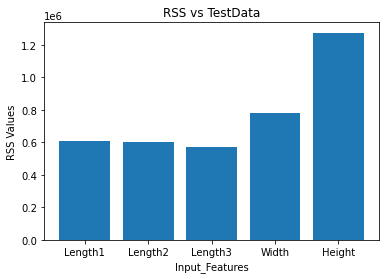

<Figure size 432x288 with 0 Axes>

In [176]:
#plot the graph for RSS Vs TestData.
plt.figure()
plt.bar(Features,TestDataG)
plt.title("RSS vs TestData")
plt.xlabel("Input_Features")
plt.ylabel("RSS Values")
plt.show()
plt.savefig('RSS Vs TestData.png')

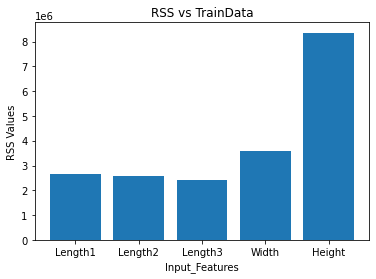

<Figure size 432x288 with 0 Axes>

In [177]:
#plot the graph for RSS Vs TrainData.
plt.figure()
plt.bar(Features,TrainDataG)
plt.title("RSS vs TrainData")
plt.xlabel("Input_Features")
plt.ylabel("RSS Values")
plt.show()
plt.savefig('RSS Vs TrainData.png')

###### Q. 7 Will model improve if we take two or more ‘input_features’ at a time? In any case give reason.

Yes, As per my research and implementation, model accuracy will be the increase by adding the two or more input_feature at a time. Because, when input_feature data is increasing it will increase the training data and higher the training data that means lower residuals (Error). Because adding more input features or columns increasing overfitting. Overfitting only happens in model when model considering noise and details both from the training dataset. Higher training data also decrease the model complexity.



## REFRENCES


[1] Wiriyapong, B., & TH, K. (2020). bensw. Retrieved 20 October 2020, from http://www.bensw.xyz/regression/Simple-Linear-Regression/

[2] tuanavu/coursera-university-of-washington. (2020). Retrieved 20 October 2020, from https://github.com/tuanavu/coursera-university-of-washington/blob/master/machine_learning/2_regression/assignment/week1/README.MD

[3] Linear Regression in Python with Scikit-Learn. (2020). Retrieved 20 October 2020, from https://stackabuse.com/linear-regression-in-python-with-scikit-learn/